# **Customer Churn Prediction**

Candidate: Hoang Trung Hiep

## **Overview**

The dataset contains 7043 samples. Each samples contains 20 features and 1 boolean variable `churn` which indicates the class of the sample. The 20 features and 1 target variable are:

* `customerID`
* `gender`: Whether the customer is a male or a female.
*`SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0).
*`Partner`: Whether the customer has a partner or not (Yes, No).
*`Dependents`: Whether the customer has dependents or not (Yes, No).
*`tenure`: Number of months the customer has stayed with the company.
*`PhoneService`: Whether the customer has a phone service or not (Yes, No).
*`MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service).
*`InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
*`OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service).
*`DeviceProtection`: Whether the customer has online security or not (Yes, No, No internet service).
*`OnlineBackup`:Whether the customer has online backup or not (Yes, No, No internet service).
*`DeviceProtection`:Whether the customer has device protection or not (Yes, No, No internet service).
*`TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service).
*`StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service).
*`StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service).
*`Contract`: The contract term of the customer (Month-to-month, One year, Two year).
*`PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No).
*`PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
*`MonthlyCharges`: The amount charged to the customer monthly.
*`TotalCharges`: The total amount charged to the customer.
*`churn`: Whether the customer churned or not (Yes or No).

# Loading and Exploring the data

In this section, we will load the dataset and conduct an initial exploration to understand its structure and contents. This involves examining the data types, identifying missing values, and performing basic statistical analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path, index_col = 'customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 20)

The DataFrame is sizable, with 7043 rows and 21 columns.

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

As we can see, there are 18 features of type object and 3 features that are numerical.

Howerver, TotalCharges features has wrong data type.

In [ ]:
#Convert data type of TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## Basic Statistical Analysis:

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


As we can see:
1. `SeniorCitizen`:

* This is a binary variable (0 or 1), representing whether a customer is a senior citizen or not. As such, it follows a binomial distribution, with two outcomes: 1 (Senior Citizen) and 0 (Non-Senior Citizen).
* The mean of 0.162 indicates around 16.2% of customers are senior citizens.
2. `tenure`:

* tenure represents the number of months a customer has been with the company, with values ranging from 0 to 72.
* Mean tenure is 32.37 months, suggesting that the avarage customer has been with company for about 2.7 years.
* The standard deviation is 24.56 months, showing a wide spread in how long customers have stayed.
* The minimum value is 0 months, and the maximum is 72 months, with 25% of customers staying for 9 months or less, and 75% staying for 55 months or less.

3. `MonthlyCharges`:

* The mean is 64.76, while the standard deviation is 30.09, suggesting that customers are charged highly variable amounts.
* The minimum charge is 18.25, and the maximum is 118.75, with the 25th percentile at 35.50 and the 75th percentile at 89.85.

4. `TotalCharges`:

* count: 7032 (there are 11 samples with missing data)
* mean: 2283.30 (the average total amount spent by customers is 2283.30 USD)
*min and max: 18.80 and 8684.80 (the lowest and highest amounts spent)




## Churn distribution

Visulize the distribution of churn using pie chart.

In [ ]:
#Preparing table
churn_ratio = pd.DataFrame(round(df['Churn'].value_counts()/len(df)*100,2)).T
churn_ratio

Churn,No,Yes
count,73.46,26.54


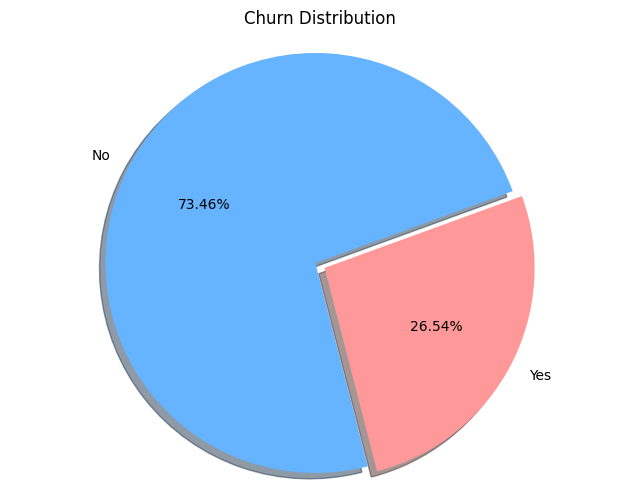

In [ ]:
# Prepare for plotting
labels = churn_ratio.columns
sizes = churn_ratio.values.tolist()[0]
colors = ['#66b3ff','#ff9999']
explode = (0.05, 0)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=20)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Check for missing data

Identify any missing values in the datasets.

In [ ]:
# Check for missing value.
missing_values = df.isnull().sum()
print('Missing data :',missing_values[missing_values>0])

Missing data : TotalCharges    11
dtype: int64


Since the missing data only affects 11 rows, we will remove them to avoid losing information from other columns

In [ ]:
#Remove all rows with missing value
df = df.dropna(subset=['TotalCharges'])
df.shape

(7032, 20)

# Exploratory Data Analysis (EDA)

## Plot Count of Categorical Features

In [ ]:
categ_column = []
for col in df.columns:
    if df[col].dtype == 'object':
        categ_column.append(col)
categ_column.append('SeniorCitizen')
print(len(categ_column))

17


Visualize the count of each category for categorical feature

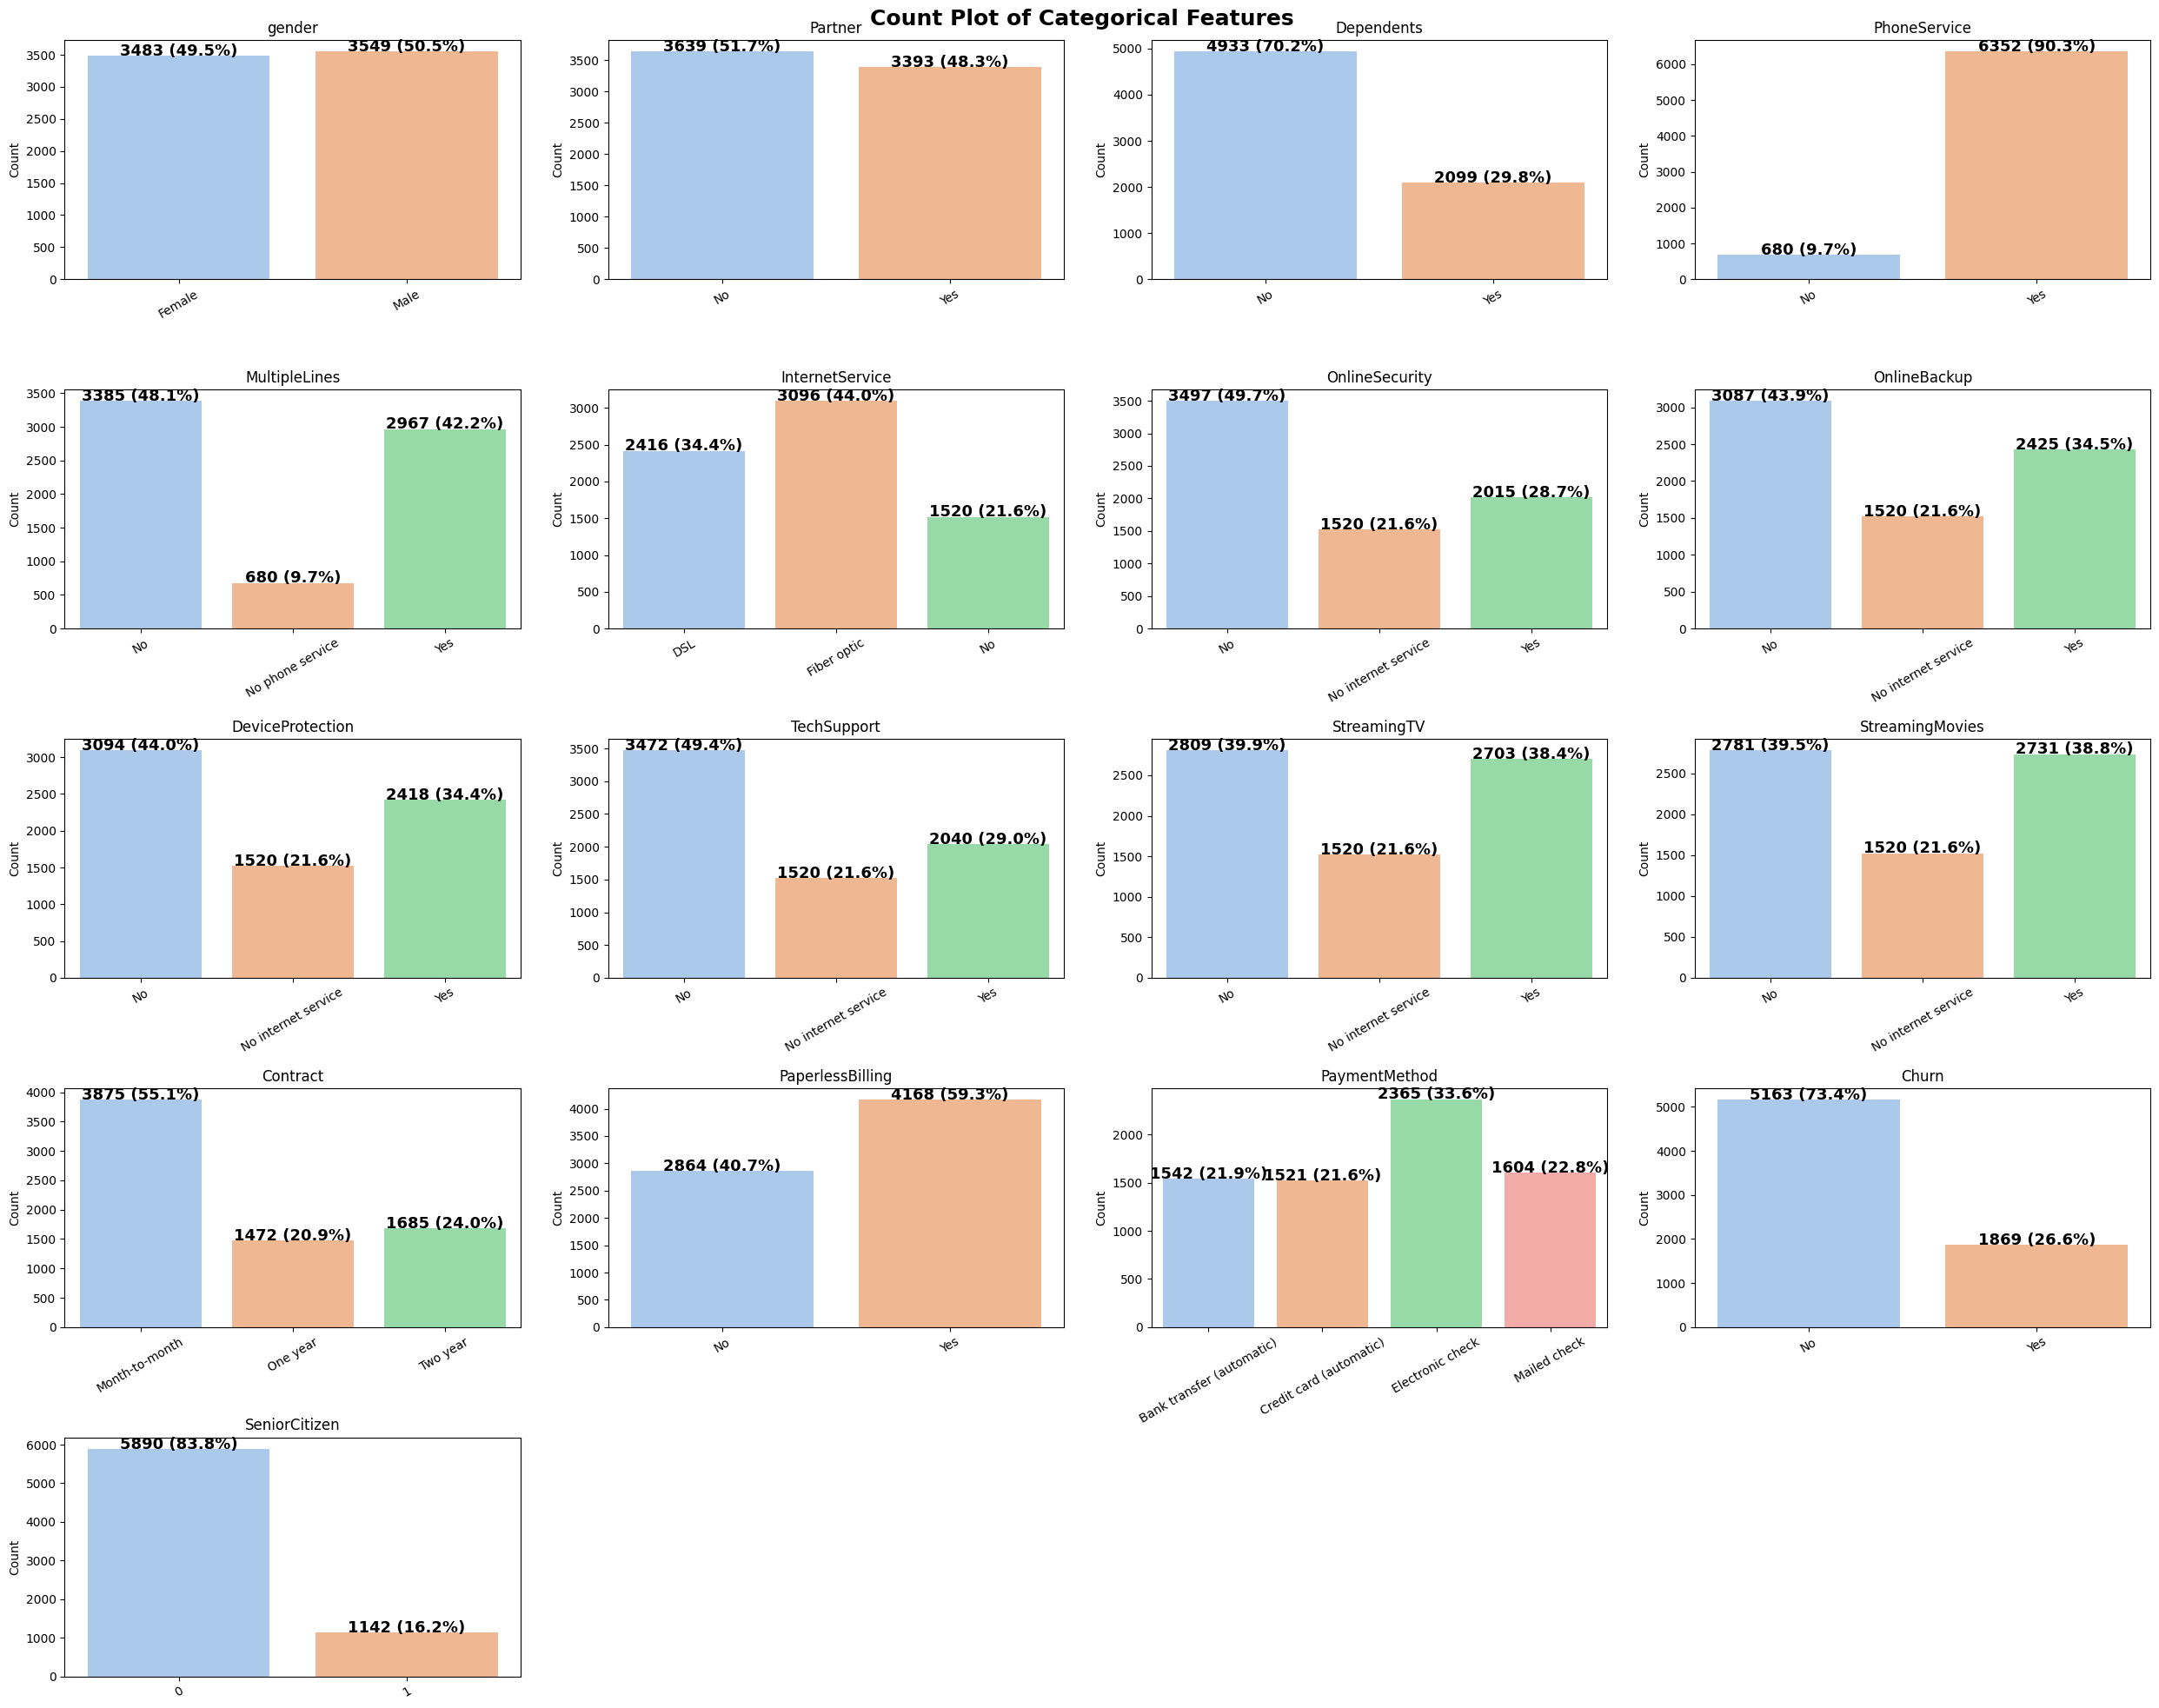

In [ ]:
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Count Plot of Categorical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
# Define color palette
palette = sns.color_palette('pastel')

for i, col in enumerate(categ_column):
  # Calculate unique values and their counts
  values, counts = np.unique(df[col], return_counts=True)

  ax = fig.add_subplot(5,4,i+1)

  # # Add percentage values
  total_counts = sum(counts)
  for index, value in enumerate(counts):
    percentage = value / total_counts * 100
    ax.text(index, value + 5, f'{value} ({percentage:.1f}%)', ha='center', size=13, fontdict={'weight': 'bold'})
  # Plot count plot with custom palette
  ax = sns.barplot(x=values, y=counts, palette=palette)
  ax.set_ylabel('Count')
  ax.set_title(col)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()



## **Plot Histograms of Numerical Features**
Plot histograms for numerical features to understand their distribution.

In [ ]:
numerical_columns = []
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_columns.append(col)
numerical_columns.remove('SeniorCitizen')
print(len(numerical_columns))

3


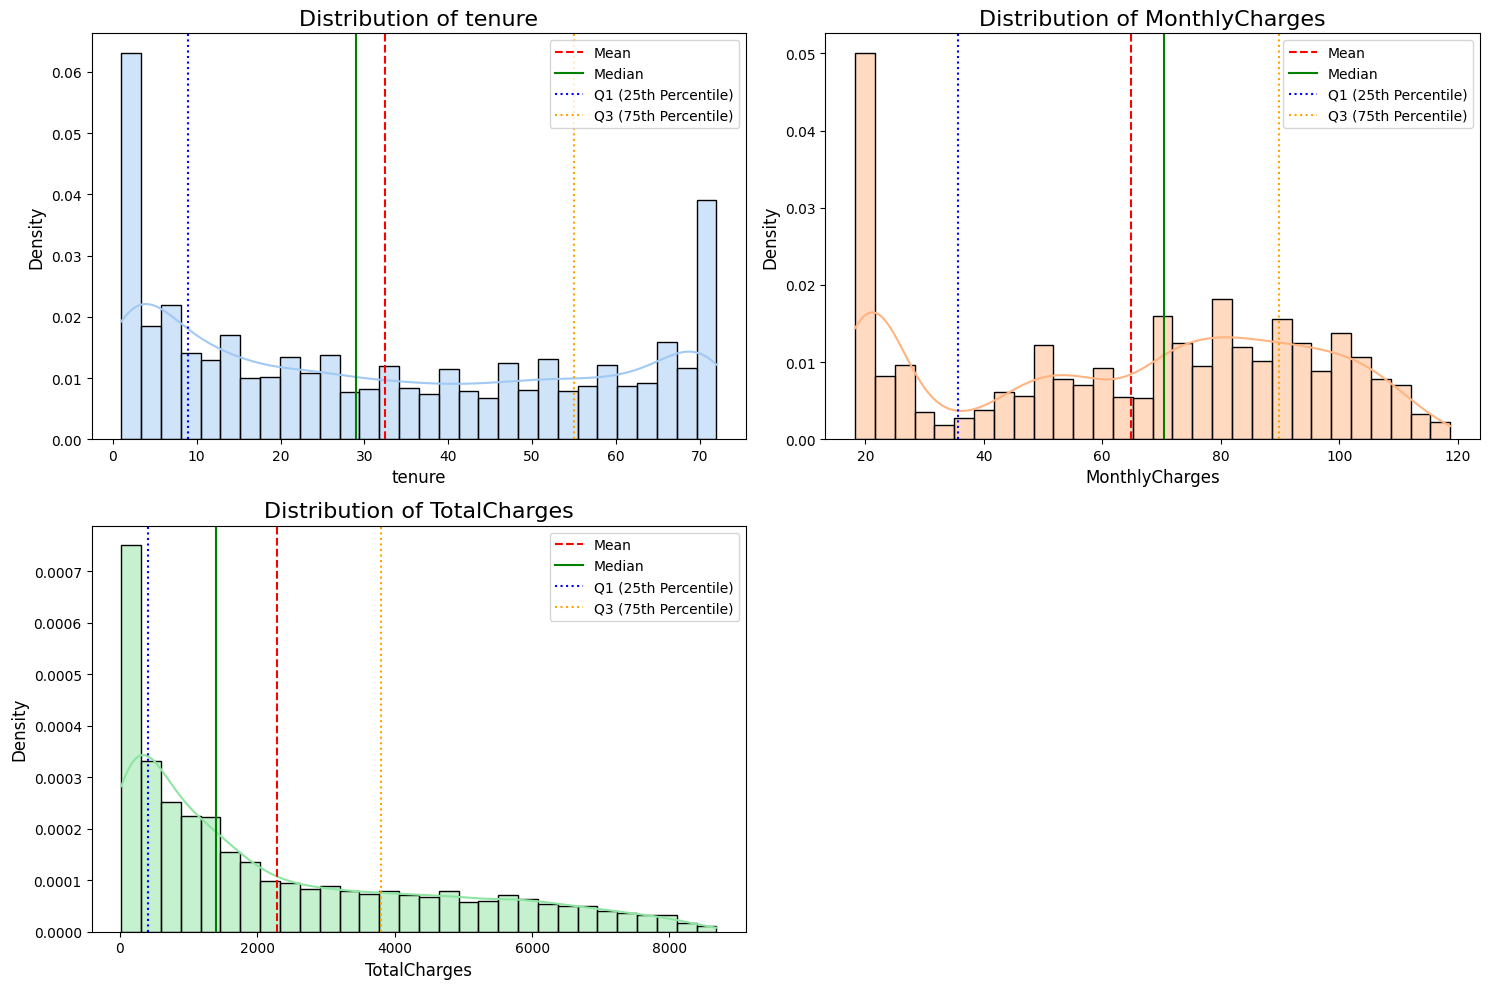

In [ ]:
fig = plt.figure(figsize=(15, 10))

# Create a color palette
palette = sns.color_palette('pastel', n_colors=len(numerical_columns))

# Iterate over each numerical column and create a histogram
for i, col in enumerate(numerical_columns):
    plt.subplot(2,2, i + 1)  # Tạo subplot cho mỗi cột
    sns.histplot(df[col], kde=True, bins=30, stat="density", alpha=0.5,color=palette[i])

    # Thêm các đường cho mean, median, quantiles
    mean = df[col].mean()
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(median, color='g', linestyle='-', label='Median')
    plt.axvline(q1, color='b', linestyle=':', label='Q1 (25th Percentile)')
    plt.axvline(q3, color='orange', linestyle=':', label='Q3 (75th Percentile)')

    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các subplot
plt.show()

## **Churn Distribution by Categorical Features**
Analyze churn distribution within each category of categorical features.

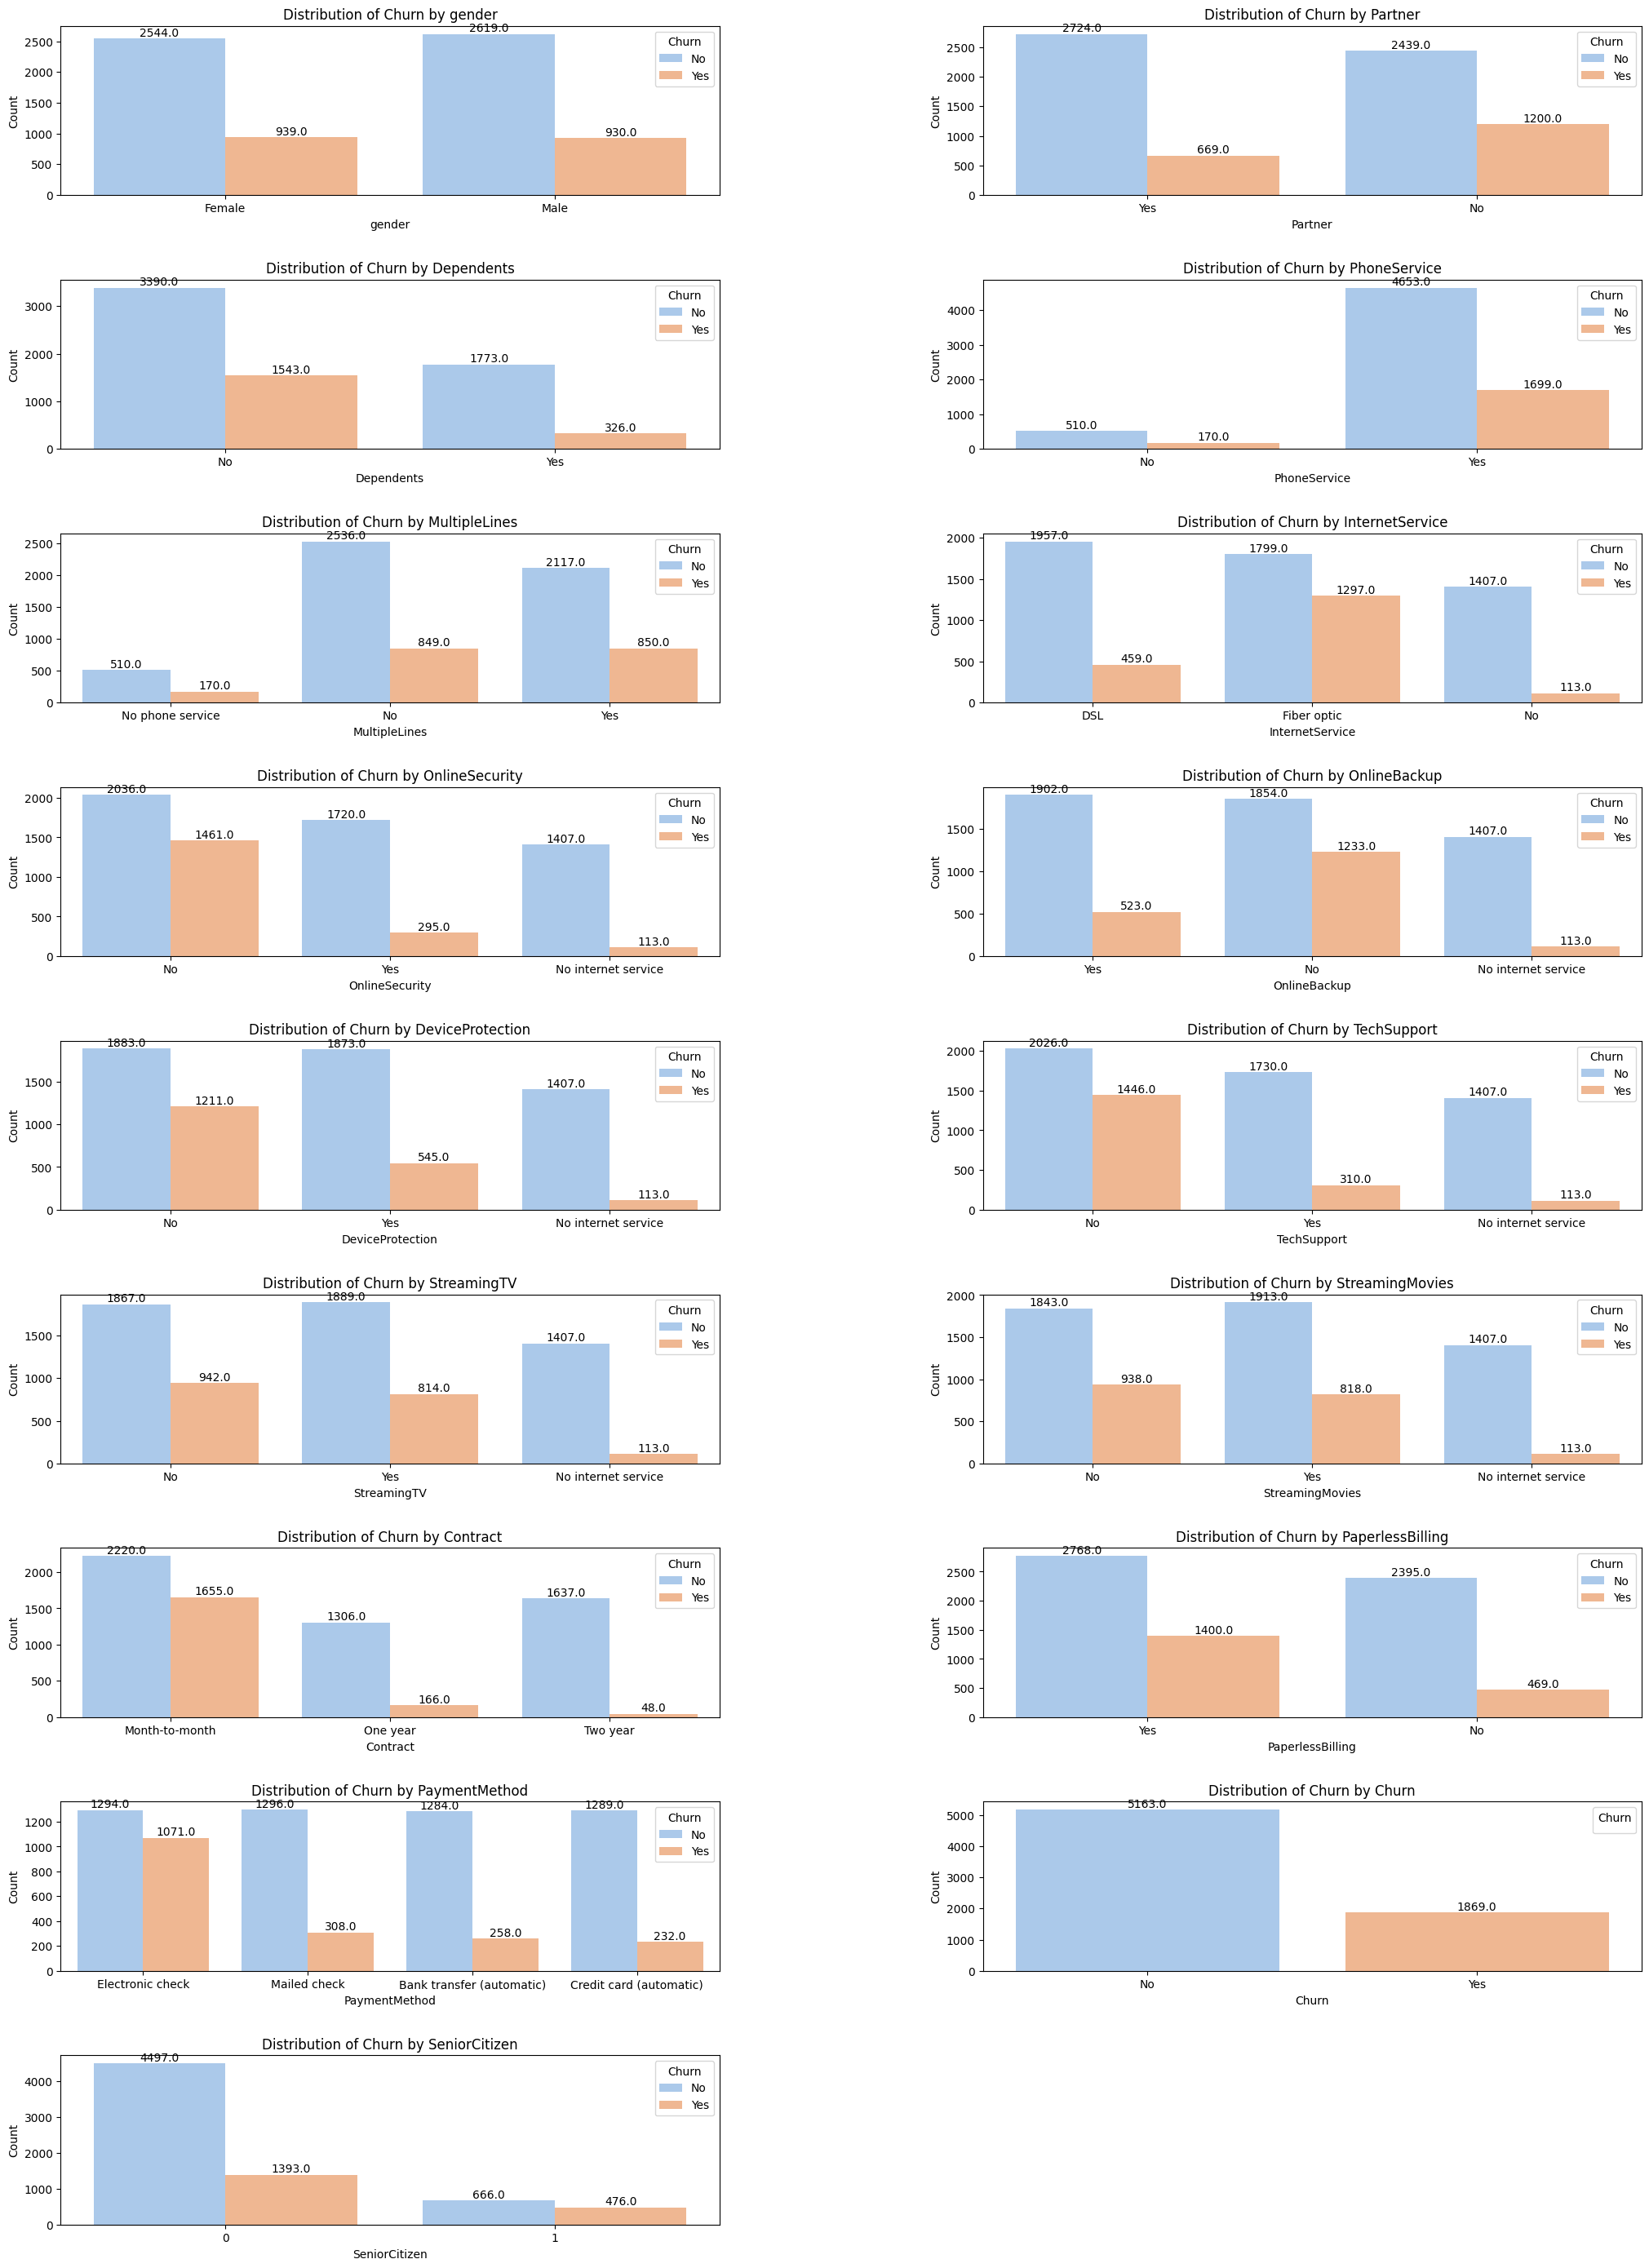

In [ ]:

fig, axes = plt.subplots(9, 2, figsize=(25, 35))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over categorical features
for i, feature in enumerate(categ_column):
    # Plot count plot for each categorical feature with churn as hue
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of Churn by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn', loc='upper right')

    # Annotate each non-zero bar with its count
    for patch in axes[i].patches:
        # Get the height of the bar
        height = patch.get_height()
        # Annotate the bar with the count value if it's not zero
        if height > 0:
            axes[i].annotate(f'{height}', (patch.get_x() + patch.get_width() / 2, height),
                             ha='center', va='bottom')

# Hide empty subplots
for j in range(len(categ_column), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()


## **Bivariate Analysis**
Perform bivariate analysis to visualize relationships between numerical features and churn.

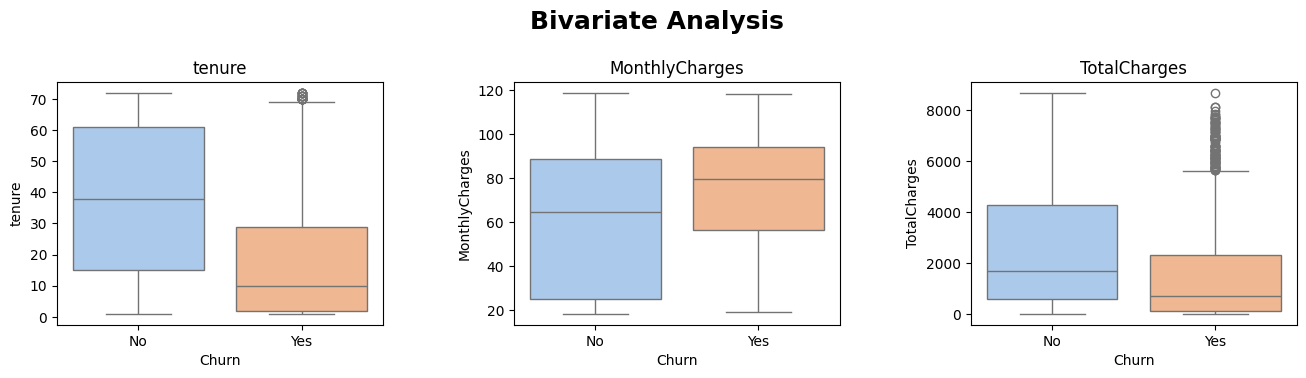

In [ ]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Define a color palette for the boxplots
palette = sns.color_palette('pastel')


#Iterate over numerical colums
for i ,col in enumerate(numerical_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'Churn' , y =col , ax=a  , data = df , palette=palette )
    a.set_title(col)

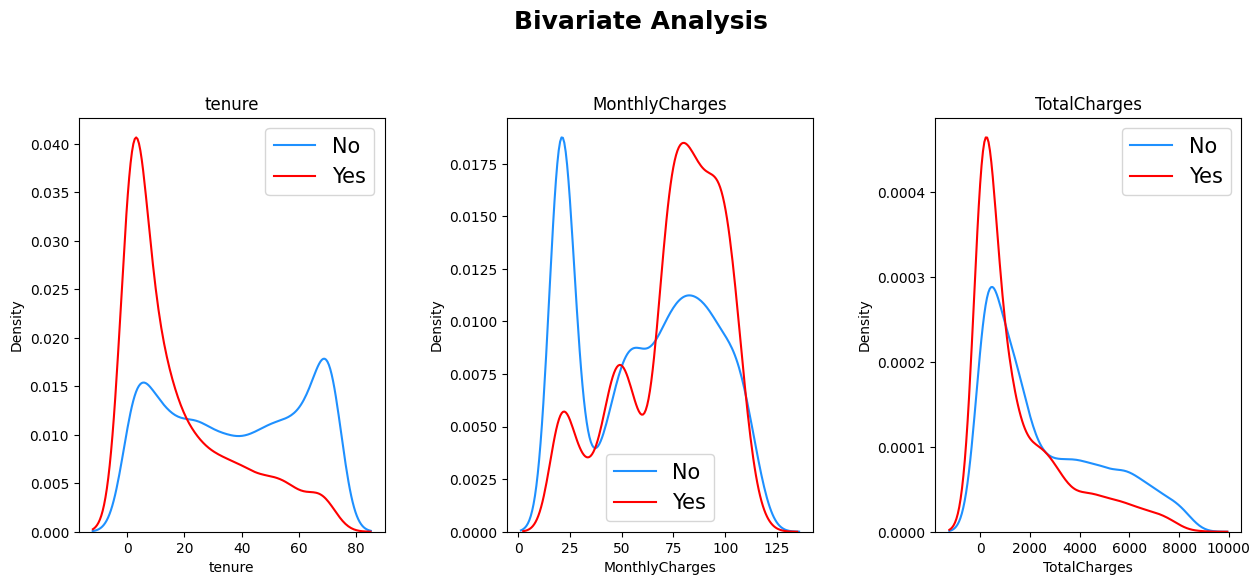

In [ ]:
fig = plt.figure(figsize=[15, 6])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, col in enumerate(numerical_columns):
    a = fig.add_subplot(1,3, i + 1)

    sns.distplot(df[df['Churn'] == 'No'][col], color='dodgerblue', ax=a, hist=False)
    sns.distplot(df[df['Churn'] == 'Yes'][col], color='red', ax=a, hist=False)
    a.set_title(col)
    labels = ['No', 'Yes']
    a.legend(labels, fontsize=15)

plt.show()


## **Check for Outliers and Remove Ouliers**
After we processing the outliers, use the calculated IQR boundary to replace the outliers with the corresponding IQR boundary. This helps clean the data and minimize the influence of outliers on data analysis and modeling. Then, redraw the boxplot graphs after processing the data to see the change in the distribution of the data columns.

In [ ]:
df_num = df[numarical_columns]
df_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

,0
tenure,False
MonthlyCharges,False
TotalCharges,False


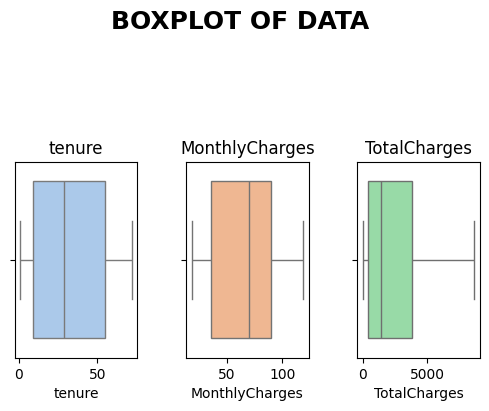

In [ ]:
# Define a custom color palette with distinct colors
custom_palette = sns.color_palette('pastel', len(numerical_columns))


fig = plt.figure(figsize=[6, 4])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.6)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Define the number of columns for subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Iterate over numerical columns
for i, col in enumerate(numerical_columns):
    ax1 = fig.add_subplot(num_rows, num_cols, i + 1)
    # Use the custom color palette for each boxplot
    ax1 = sns.boxplot(data=df, x=col, palette=[custom_palette[i]])

    ax1.set_title(f'{col}')
    ax1.set_xlabel(f'{col}')

plt.show()

# **Feature Engineering**
Create new features from existing data:

In [ ]:
# create feature: AverageMonthlyCharges from totalcharges and tenure
df['AverageMonthlyCharges'] = df['TotalCharges'] / df['tenure']

#create feature: service_count from 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
df['service_count'] = df[['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda x: x.value_counts().get('Yes', 0), axis=1)

#create feature: tenure_category
df['tenure_category'] = pd.cut(df['tenure'], bins=[-1, 12, 24, float('inf')], labels=['Short-term', 'Medium-term', 'Long-term'])


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageMonthlyCharges,service_count,tenure_category
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,0,Short-term
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,2,Long-term
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,1,Short-term
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,3,Long-term
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,0,Short-term


Encode categorical variabels:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tạo bản sao của DataFrame
df_copy = df.copy()

# Tạo đối tượng LabelEncoder
le = LabelEncoder()

for col in df_copy.columns:
    if df_copy[col].dtype == 'object' or df_copy[col].dtype == 'category':
        # Mã hóa và gán lại vào cột
        df_copy[col] = le.fit_transform(df_copy[col])


In [ ]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageMonthlyCharges,service_count,tenure_category
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,29.850000,0,2
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,0,55.573529,2,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,54.075000,1,2
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,40.905556,3,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,75.825000,0,2


# **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split


X = df_copy.drop('Churn', axis=1)
y = df_copy['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train features shape: {X_train.shape}')
print(f'Test features shape: {X_test.shape}')
print(f'Train target shape: {y_train.shape}')
print(f'Test target shape: {y_test.shape}')

Train features shape: (5625, 22)
Test features shape: (1407, 22)
Train target shape: (5625,)
Test target shape: (1407,)


# Some Function

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
def Model_features(X_train, y_train, X_test, y_test, y_pred, classifier, model_name):
    # Calculate the accuracy, precision, recall, and F1-score
    # Combine X_train and X_test for cross-validation
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1_s = round(f1_score(y_test, y_pred), 3)
    c_val_score = round(cross_val_score(classifier, X, y, cv=10, scoring='accuracy').mean(), 3)

    print(f'Accuracy Score is : {accuracy}')
    print(f'Precision Score is : {precision}')
    print(f'Recall Score is : {recall}')
    print(f'f1 Score is : {f1_s}')
    print(f'Cross Val Score is : {c_val_score}')
    print(classification_report(y_test, y_pred))

In [ ]:
def feature_weights(X_train, classifier, classifier_name):
    # For XGBoost, use feature_importances_ instead of coef_
    if isinstance(classifier, XGBClassifier):
        weights = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    else:
        weights = round(pd.Series(classifier.coef_[0], index=X_train.columns).sort_values(ascending=False), 2)

    top_weights_selected = weights[:5]

    plt.figure(figsize=(7, 6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    plt.show()

In [ ]:
def confusion_matrix_plot(X_test, y_test, classifier, classifier_name):
    cm = confusion_matrix(y_test, classifier.predict(X_test))  # Calculate the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])  # Create a display object

    # Plot the confusion matrix with a custom colormap and additional visual elements
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='viridis', ax=ax, values_format='d', colorbar=False)

    plt.title(f"{classifier_name} Confusion Matrix", fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)

    # Add gridlines
    ax.grid(False)

    # Customize tick labels
    plt.xticks(ticks=[0, 1], labels=["No Churn", "Churn"], fontsize=12)
    plt.yticks(ticks=[0, 1], labels=["No Churn", "Churn"], fontsize=12)

    # Add colorbar for reference
    cbar = plt.colorbar(disp.im_, ax=ax)
    cbar.ax.set_ylabel('Counts', rotation=270, labelpad=15)

    plt.show()  # Show the plot

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
from skopt.space import Real, Integer

# Define the search space for Bayesian Optimization
search_spaces = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'min_child_weight': Integer(1, 10),
    'max_depth': Integer(3, 15),
    'subsample': Real(0.5, 1.0, prior='uniform'),
    'colsample_bytree': Real(0.5, 1.0, prior='uniform'),
    'gamma': Real(0, 10, prior='uniform'),
    'reg_alpha': Real(1e-9, 1.0, prior='log-uniform'),
    'reg_lambda': Real(1e-9, 1.0, prior='log-uniform'),
    'n_estimators': Integer(50, 200)
}


## XGBoost

In [ ]:
# Initialize XGBoost model without tuning
model_xgb_default = XGBClassifier(random_state=0)
model_xgb_default.fit(X_train, y_train)
y_pred_default = model_xgb_default.predict(X_test)

In [ ]:
from skopt import BayesSearchCV
# Initialize XGBoost model with Bayesian Optimization
model_xgb_opt = XGBClassifier(random_state=0)
opt = BayesSearchCV(
    model_xgb_opt, search_spaces, n_iter=30, n_jobs=-1, cv=3, random_state=0
)
opt.fit(X_train, y_train)
best_model = opt.best_estimator_
y_pred_opt = best_model.predict(X_test)

In [ ]:
# Display results before tuning
print("\nXGBoost Model Performance (Before Bayesian Search):")
Model_features(X_train, y_train, X_test, y_test, y_pred_default, model_xgb_default, "XGBoost (Before)")


XGBoost Model Performance (Before Bayesian Search):
Accuracy Score is : 0.768
Precision Score is : 0.573
Recall Score is : 0.505
f1 Score is : 0.537
Cross Val Score is : 0.784
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407




Top Features (Before Bayesian Search):


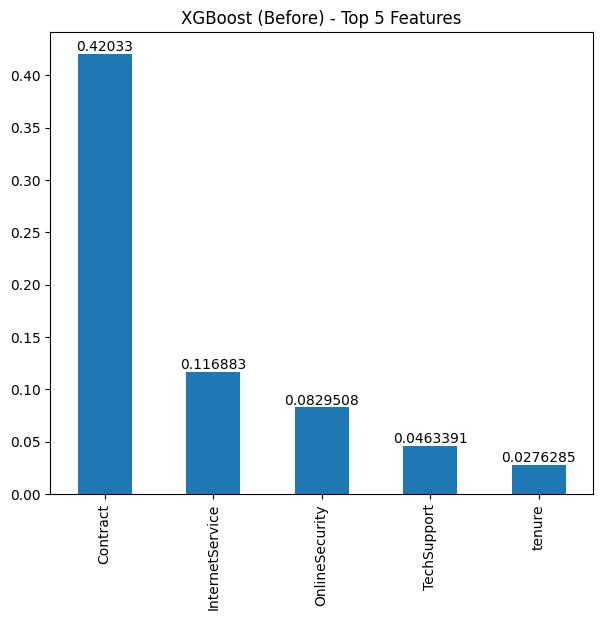

In [ ]:
# Display top features before tuning
print("\nTop Features (Before Bayesian Search):")
feature_weights(X_train, model_xgb_default, "XGBoost (Before)")

In [ ]:
# Display results after tuning
print("\nOptimized XGBoost Model Performance (After Bayesian Search):")
Model_features(X_train, y_train, X_test, y_test, y_pred_opt, best_model, "XGBoost (After)")


Optimized XGBoost Model Performance (After Bayesian Search):
Accuracy Score is : 0.794
Precision Score is : 0.647
Recall Score is : 0.495
f1 Score is : 0.561
Cross Val Score is : 0.801
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407




Top Features (After Bayesian Search):


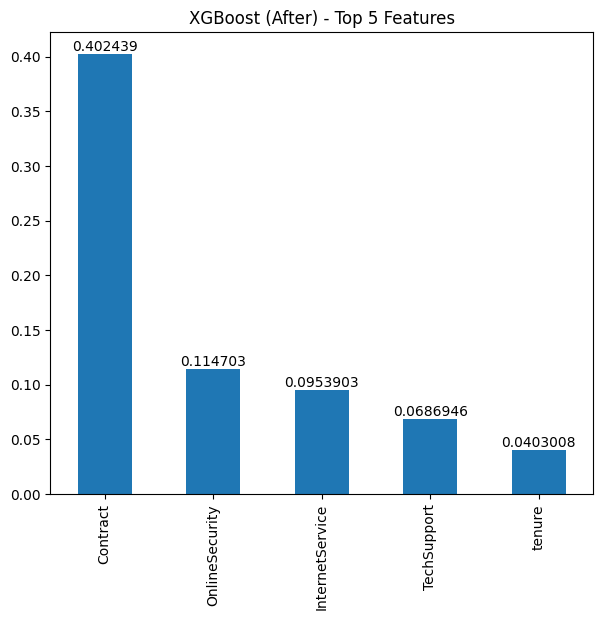

In [ ]:
# Display top features after tuning
print("\nTop Features (After Bayesian Search):")
feature_weights(X_train, best_model, "XGBoost (After)")

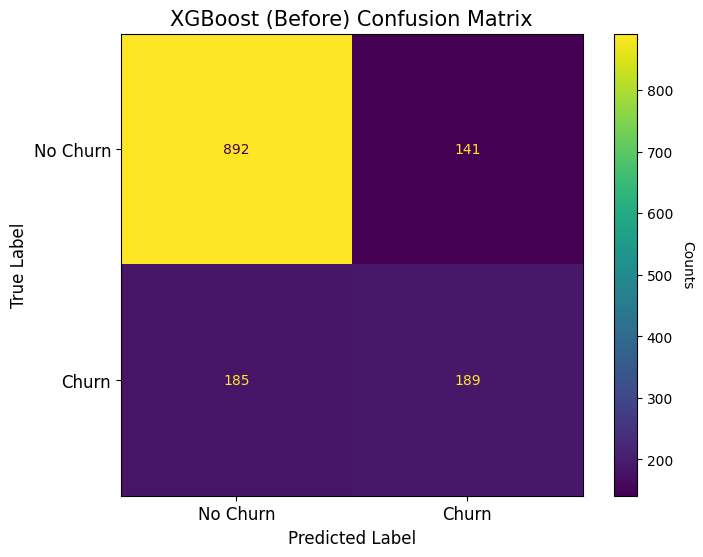

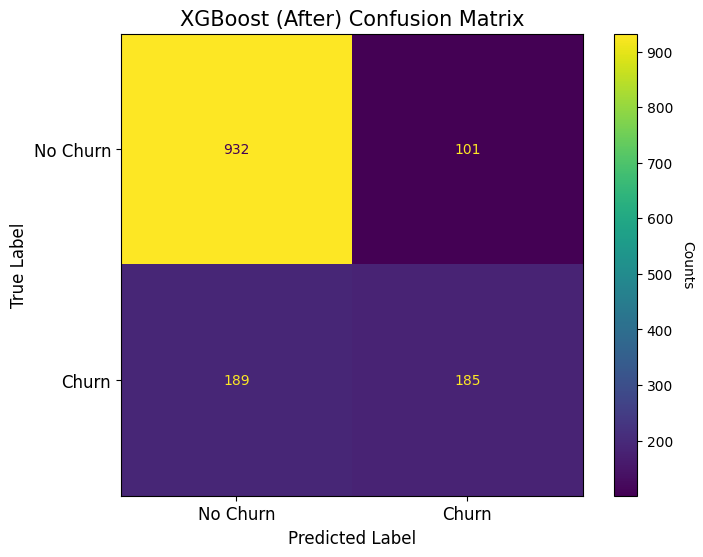

In [ ]:
# Compare confusion matrices
confusion_matrix_plot(X_test, y_test, model_xgb_default, "XGBoost (Before)")
confusion_matrix_plot(X_test, y_test, best_model, "XGBoost (After)")